In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
import os
from glob import glob

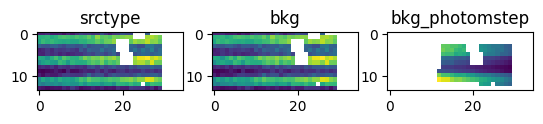

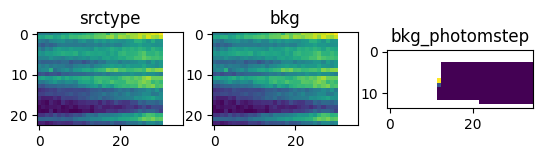

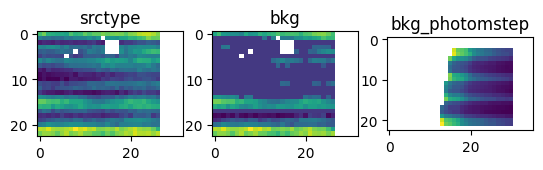

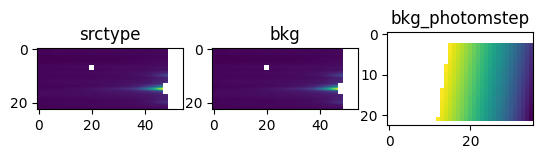

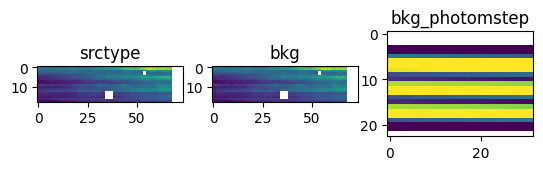

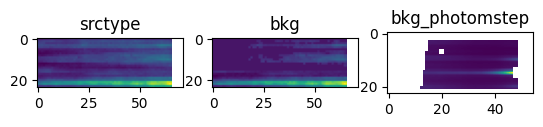

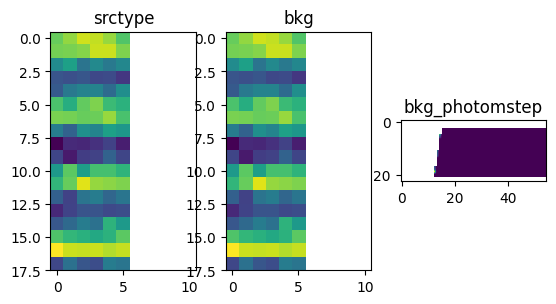

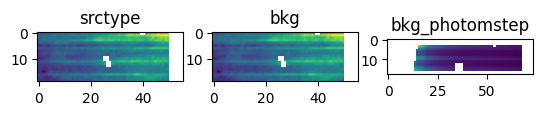

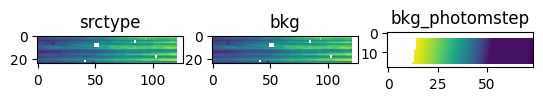

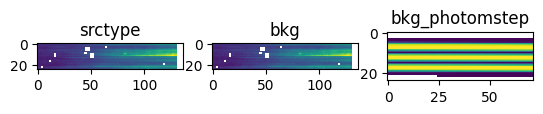

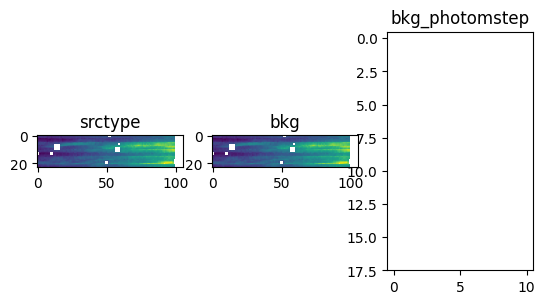

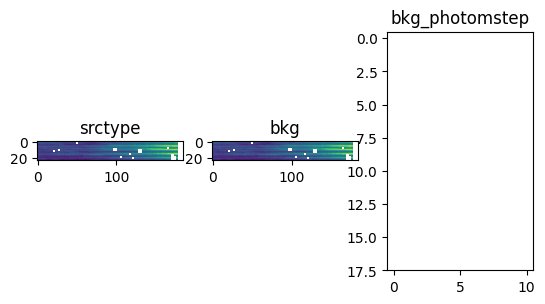

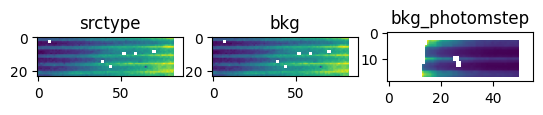

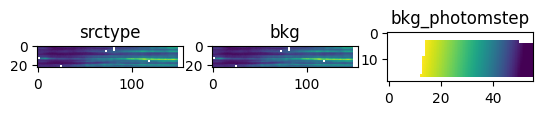

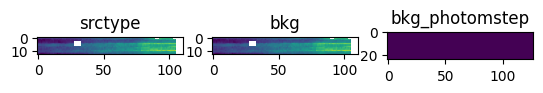

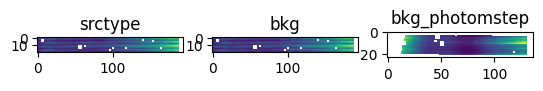

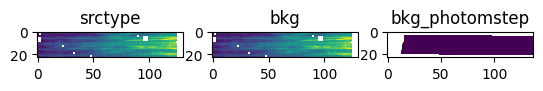

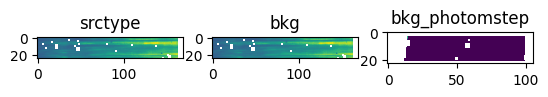

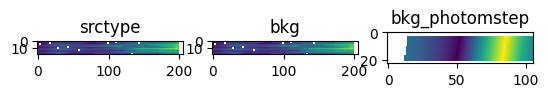

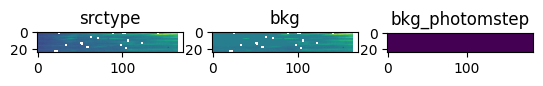

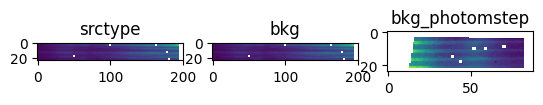

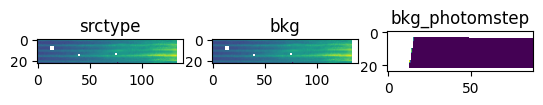

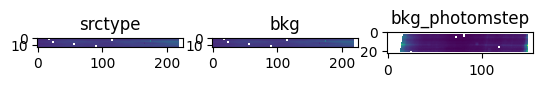

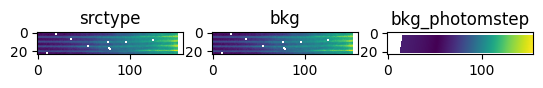

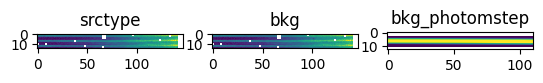

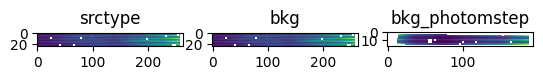

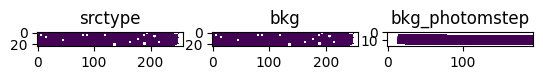

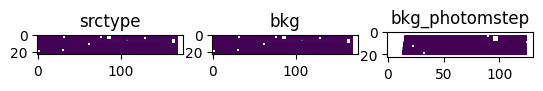

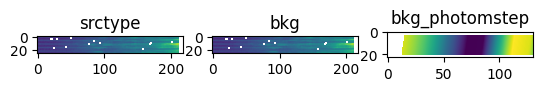

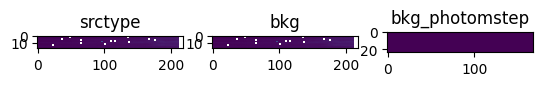

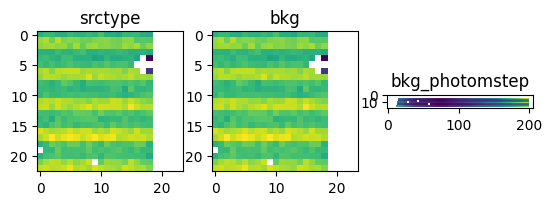

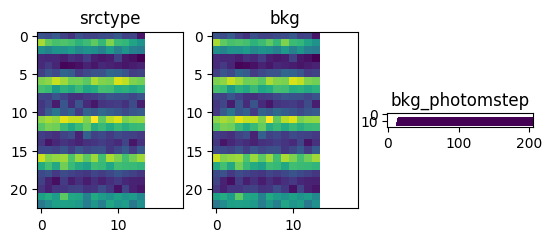

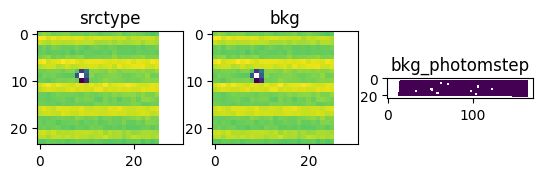

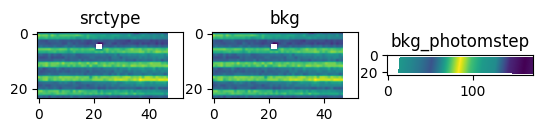

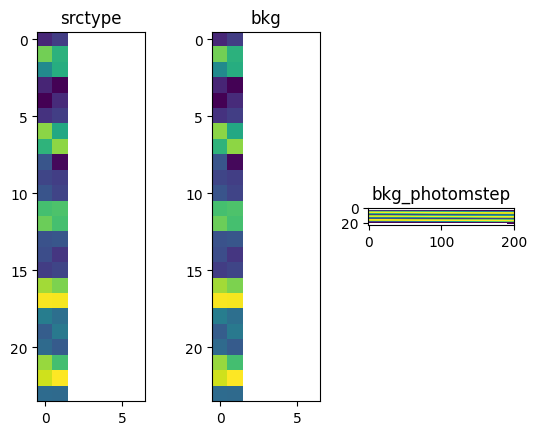

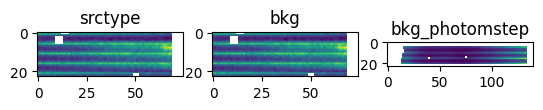

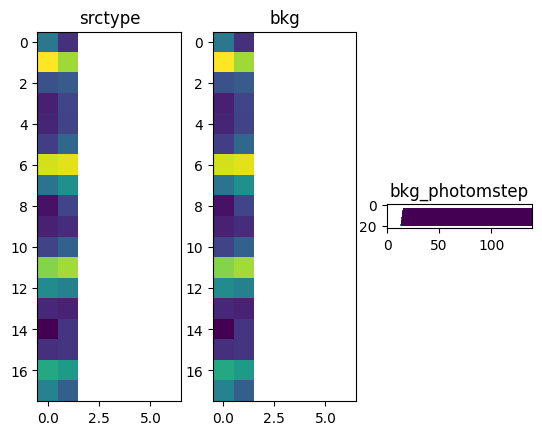

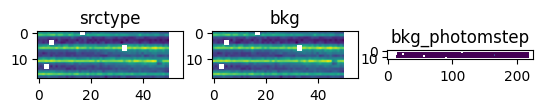

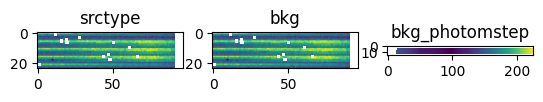

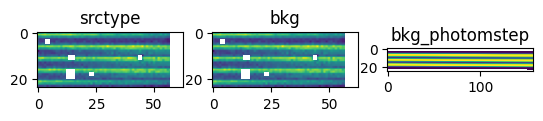

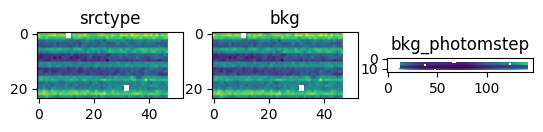

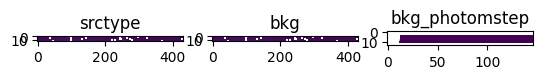

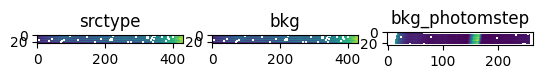

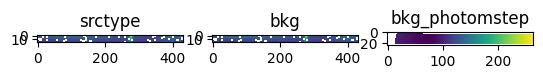

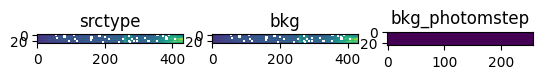

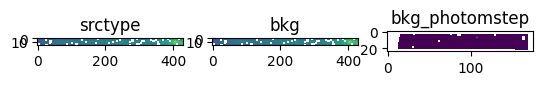

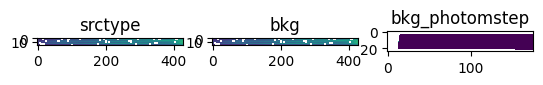

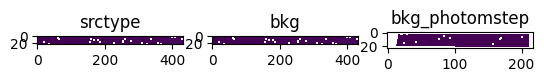

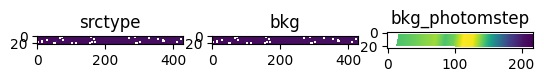

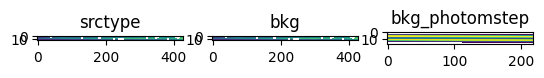

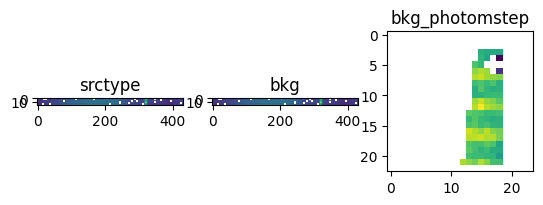

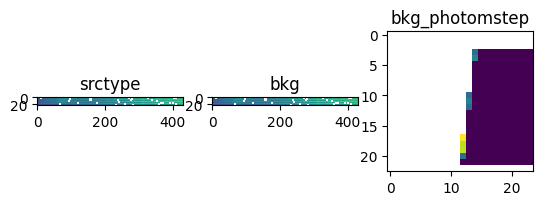

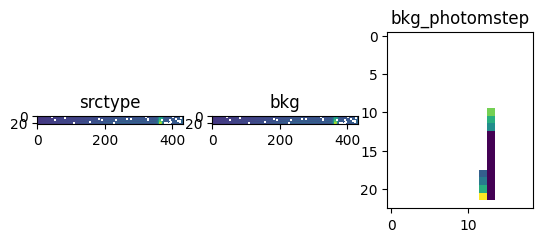

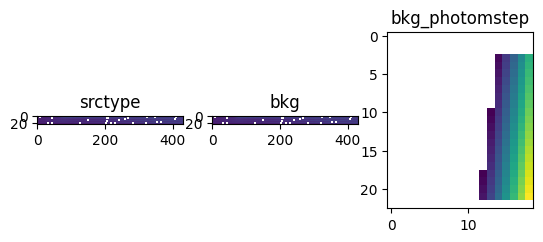

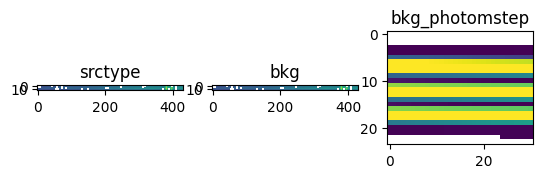

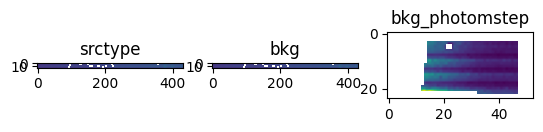

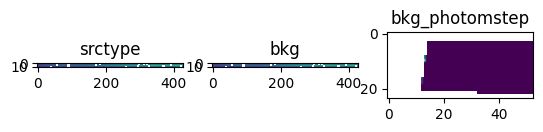

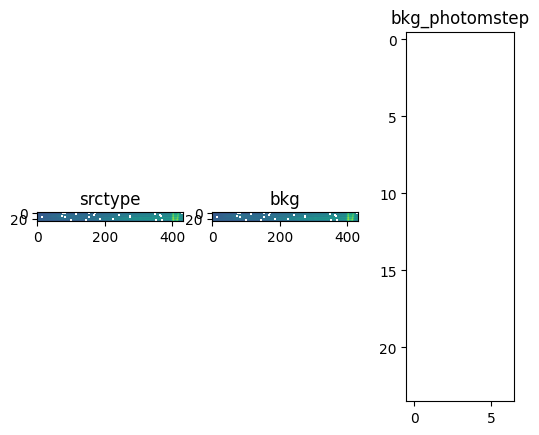

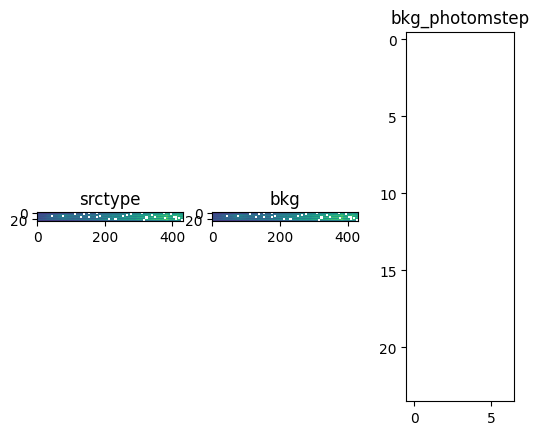

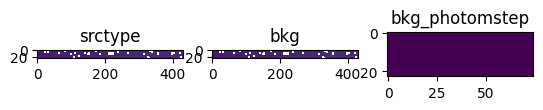

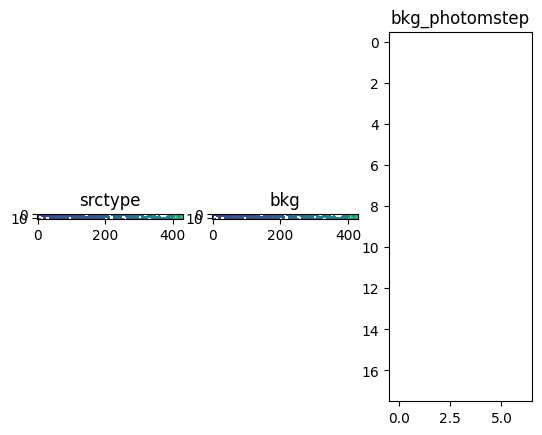

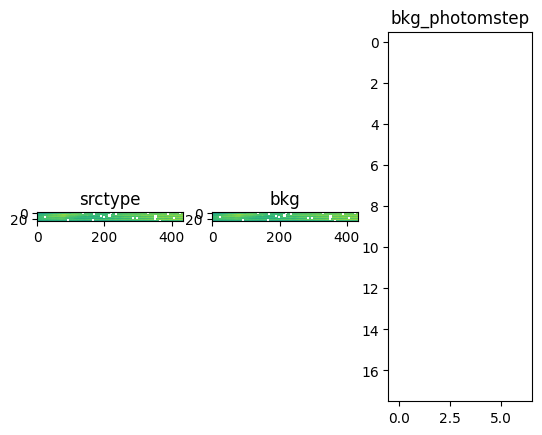

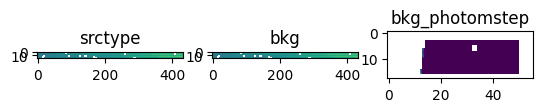

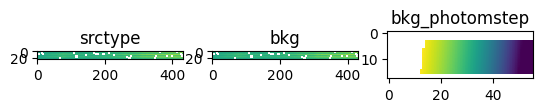

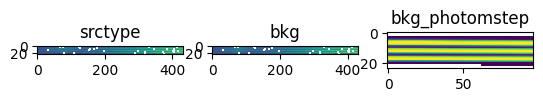

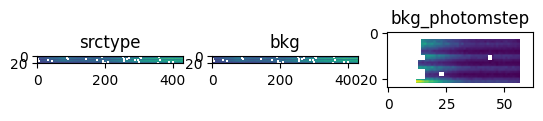

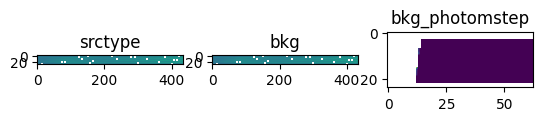

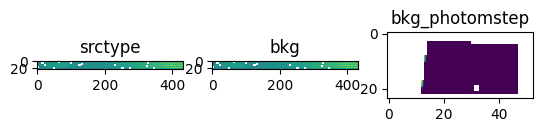

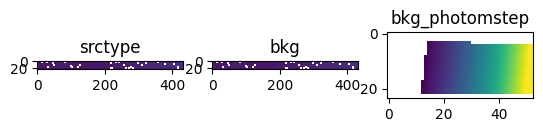

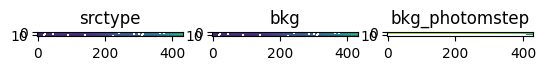

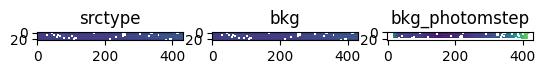

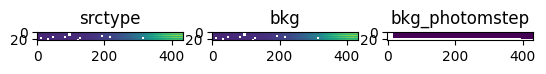

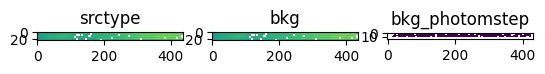

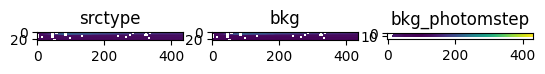

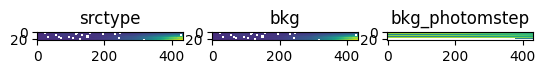

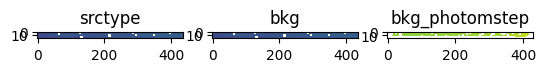

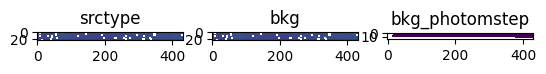

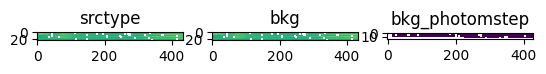

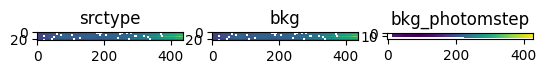

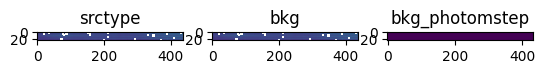

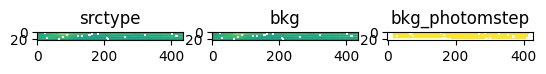

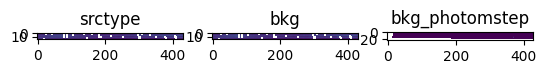

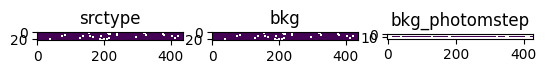

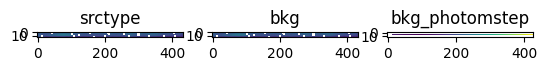

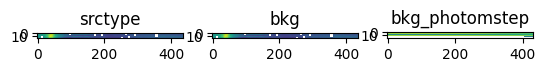

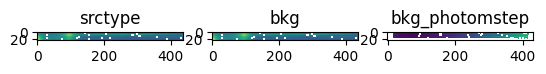

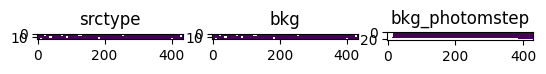

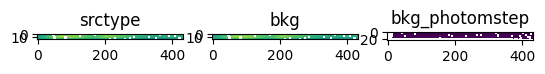

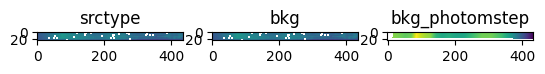

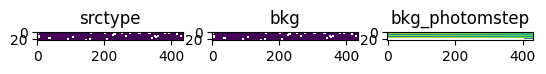

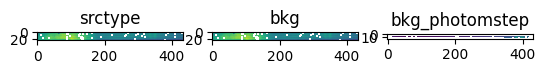

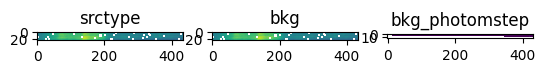

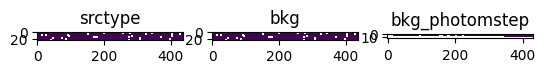

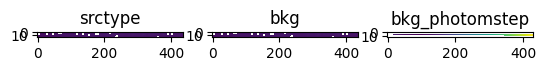

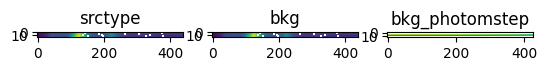

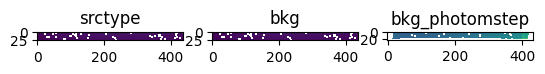

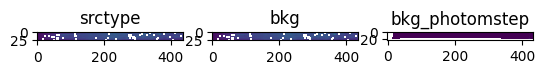

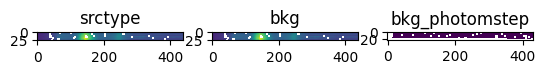

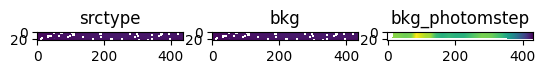

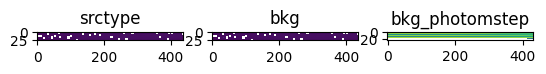

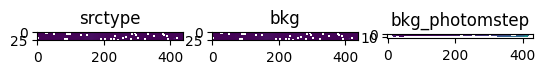

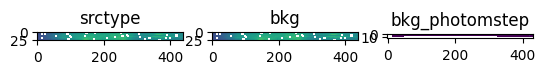

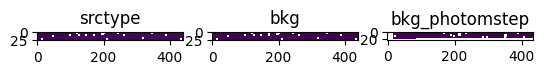

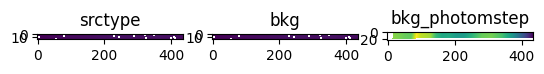

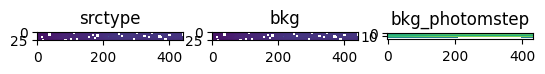

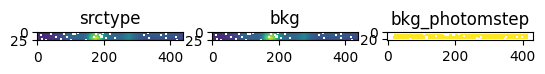

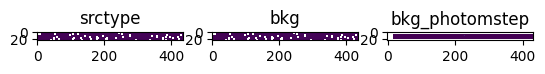

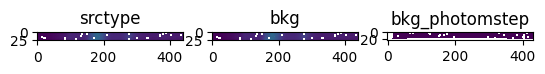

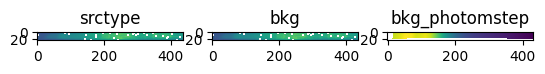

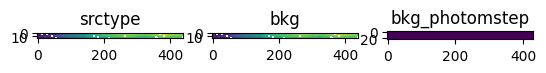

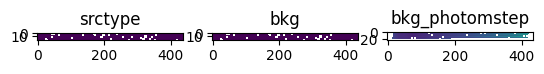

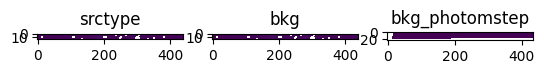

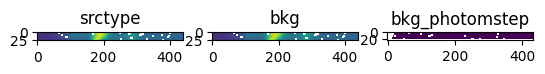

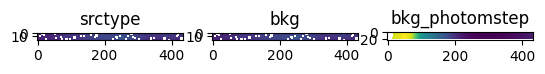

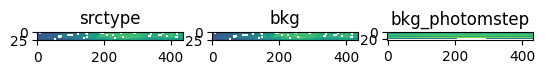

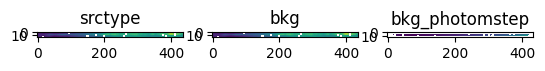

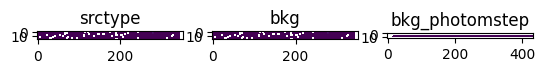

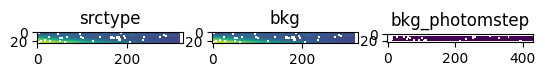

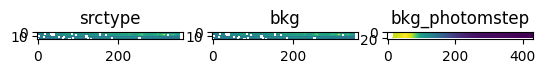

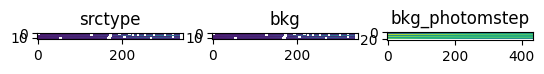

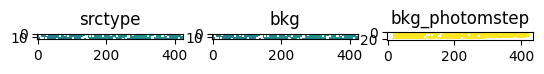

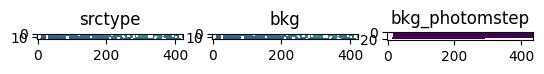

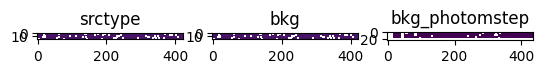

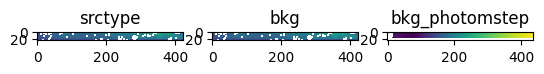

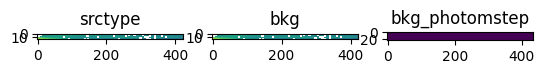

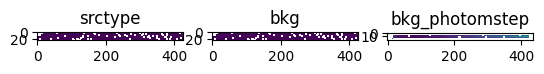

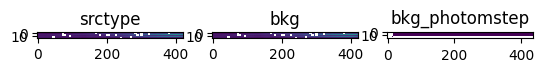

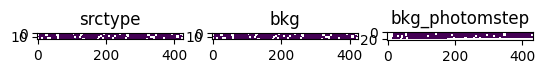

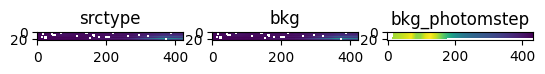

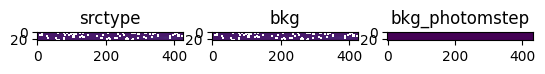

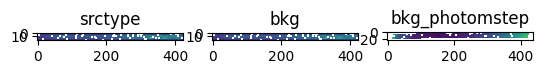

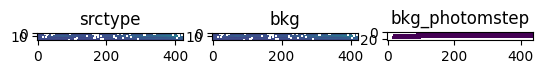

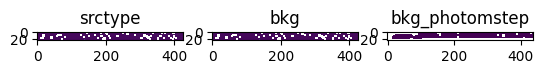

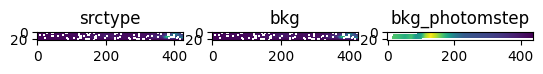

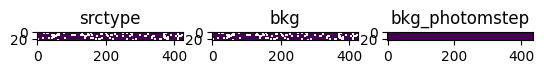

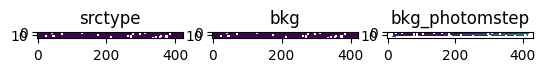

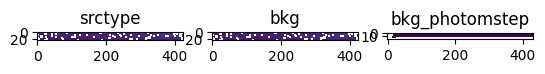

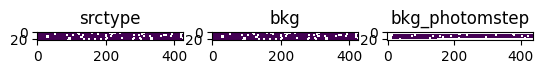

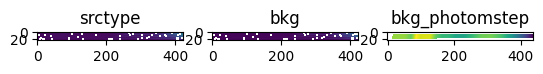

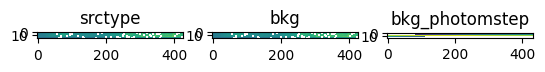

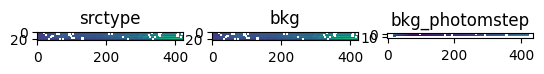

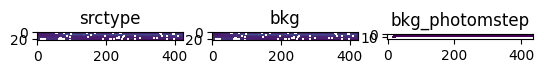

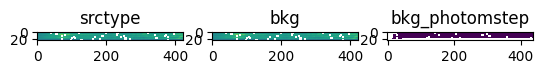

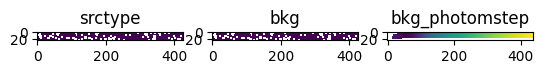

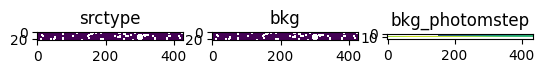

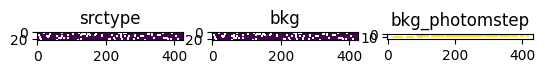

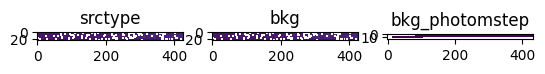

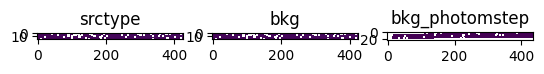

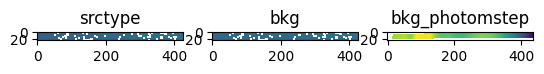

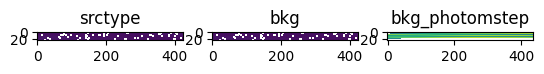

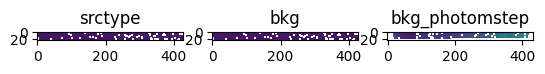

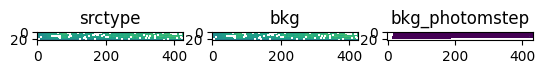

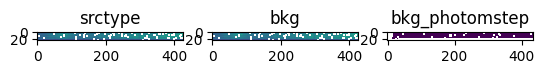

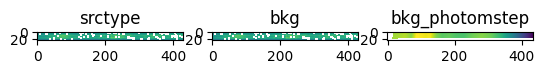

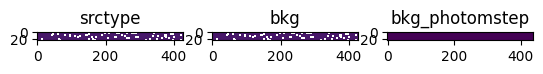

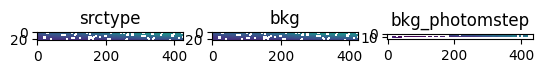

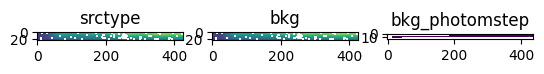

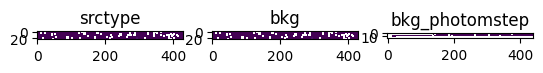

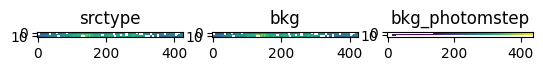

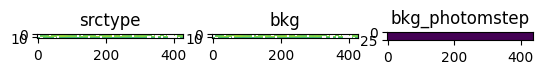

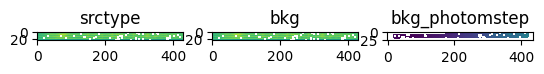

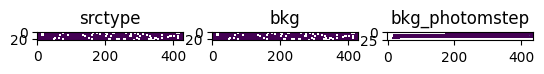

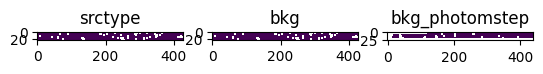

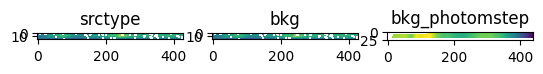

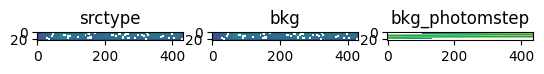

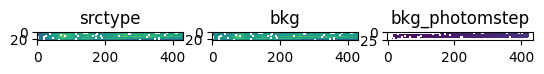

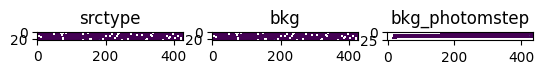

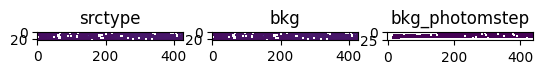

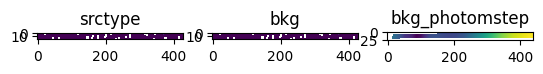

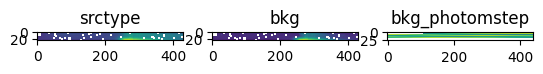

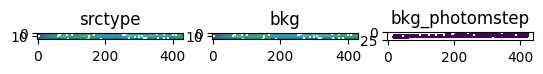

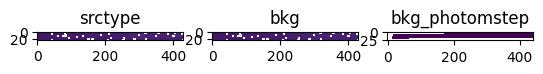

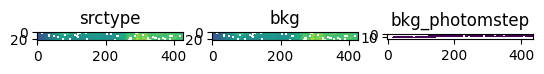

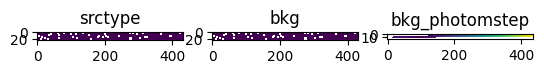

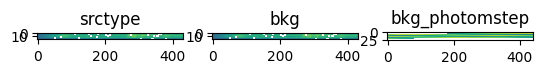

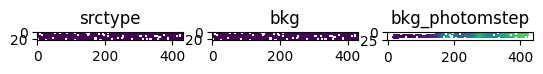

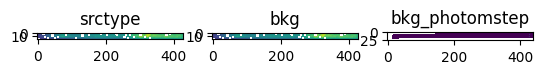

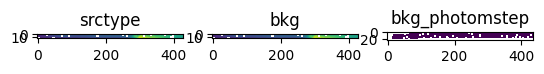

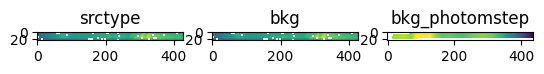

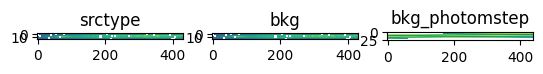

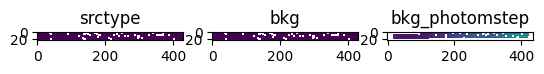

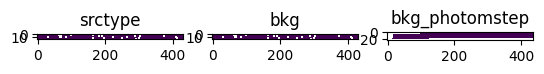

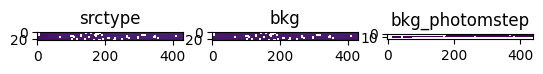

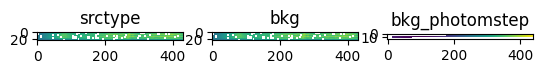

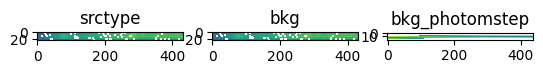

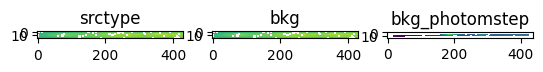

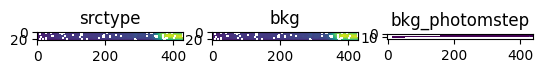

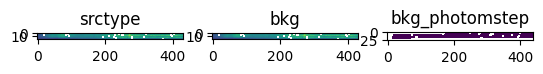

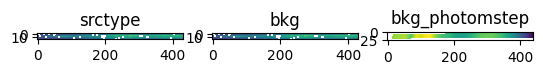

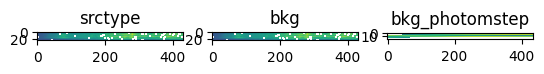

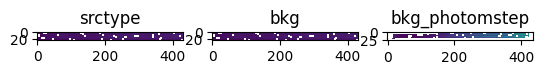

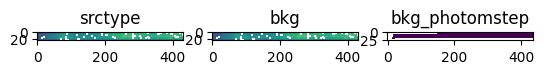

In [2]:
name = "jw01345070001_05101_00003_nrs1_"
suffix = ["srctype","bkg","bkg_photomstep"]

hdul = []
for i,s in enumerate(suffix):
    hdul.append(fits.open(name+s+".fits"))
    
    
    
for n in range(len(hdul[0])):
    if not hdul[0][n].name == "SCI":
        continue
    plt.figure()
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.imshow(hdul[i][n].data)
        plt.title(suffix[i])
    plt.show()
    

In [2]:
def numberSameLength(entry):
    """
    Prepends 0 to a number in order to respect the XXXXX format
    ----------
    entry : a number, assumed to be < 5 chars long

    Returns
        a str with 0 prepended to a number
    -------

    """
    entry = [*str(entry)]
    while len(entry) < 5:
        entry.insert(0, '0')
    entry = "".join(entry)
    return entry

In [17]:
path = "../mastDownload/JWST/CEERS-NIRSPEC-P5-PRISM-MSATA/Final/"

# Creates a file signifying that the pipeline has finished
# As a bonus, this file acts as a table containing the names of the files mentioned in slits_with_double_object.dat
double_slits = pd.read_csv("../slits_with_double_object.dat", sep=",")
main_target = double_slits["Central_target"]
companion = double_slits["Companion"]
main_target = main_target.apply(numberSameLength)
companion = companion.apply(numberSameLength)

target_path = []
n = len(main_target)
for i in range(n):
    target = main_target[i]
    _ = glob(f"{path}*{target}*_s2d.fits")
    if len(_) > 0 and f"P{double_slits['Pointing'][i]}" in _ [0]:
        target_path.append(_[0].split("/")[-1])
    else:
        target_path.append(None)

for i in range(n):
    target = companion[i]
    _ = glob(f"{path}*{target}*_s2d.fits")
    if len(_) > 0 and f"P{double_slits['Pointing'][i]}" in _ [0]:
        target_path.append(_[0].split("/")[-1])
    else:
        target_path.append(None)

file_of_interest = {"TargetType" : ["Main"]*len(main_target) + ["Companion"]*len(main_target),
                    "ID" : [*main_target, *companion],
                    "Path" : target_path}

print([*main_target, *companion])
df = pd.DataFrame(file_of_interest)
df.to_csv(f"{path}FilesOfInterest.csv")

['00386', '00757', '05674', '19960', '17699', '00386', '00613', '09141', '00076', '10685', '02962', '22247', '37988', '08997', '01378', '16772', '37597', '03765', '03929', '03535', '03929', '42683', '08656', '17695', '01374', '41330', '00549', '02549', '03480', '00603', '21913', '40971', '83534', '80954', '08105', '85630', '08045', '03971', '82167', '01211', '35134', '19565', '22842', '09743', '08656', '35134', '22310', '30152', '13348', '24686', '28042', '14589', '37993', '37597', '01381', '40571', '08997', '08735', '03928', '27182', '03928', '14904', '17699', '01779', '01376', '41323', '30308', '09076', '04696', '28944', '36641', '26509', '24977', '80955', '85626', '85634', '83582', '82049', '82168', '15972']


-0.010427047986767324
1.0485580597168613


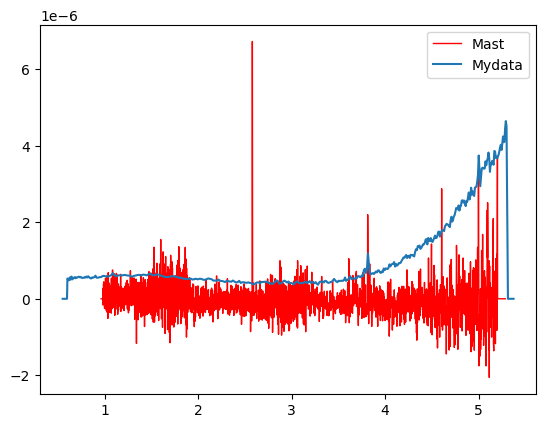

In [11]:
plt.figure()



flux = np.array([])
wave = np.array([])

with fits.open("../mastDownload/JWST/CEERS-NIRSPEC-P4-PRISM-MSATA/jw01345-o061_s00386_nirspec_f100lp-g140m_x1d.fits") as hdul:
    data = hdul[1].data
    flux = np.append(flux, data["FLUX"])
    wave = np.append(wave,data["WAVELENGTH"])
    
with fits.open("../mastDownload/JWST/CEERS-NIRSPEC-P4-PRISM-MSATA/jw01345-o061_s00386_nirspec_f170lp-g235m_x1d.fits") as hdul:
    data = hdul[1].data
    flux = np.append(flux, data["FLUX"])
    wave = np.append(wave,data["WAVELENGTH"])
    
with fits.open("../mastDownload/JWST/CEERS-NIRSPEC-P4-PRISM-MSATA/jw01345-o061_s00386_nirspec_f290lp-g395m_x1d.fits") as hdul:
    data = hdul[1].data
    flux = np.append(flux, data["FLUX"])
    wave = np.append(wave,data["WAVELENGTH"])
    plt.plot(wave,flux,label="Mast",color='r',linewidth=1)
    print(np.mean(flux)/np.std(flux))
    
    
with fits.open("../mastDownload/JWST/CEERS-NIRSPEC-P4-PRISM-MSATA/Final/jw01345-o062_s00386_nirspec_clear-prism_x1d.fits") as hdul:
    data = hdul[1].data
    flux = data["FLUX"]
    wave = data["WAVELENGTH"]
    plt.plot(wave,flux,label="Mydata")
    print(np.mean(flux)/np.std(flux))
    
plt.legend()
plt.show()
    

    


In [8]:
path = "../mastDownload/JWST/CEERS-NIRSPEC-P10-PRISM-MSATA/Final/*_s2d.fits"

for file in glob(path):
    with fits.open(file) as _:
        if _[1].header["SLITID"] == 141:
            print(_[1].header["SOURCEID"],file)

10 ../mastDownload/JWST/CEERS-NIRSPEC-P10-PRISM-MSATA/Final/jw01345-o072_s00010_nirspec_clear-prism_s2d.fits
